In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
file = 'ML AE1 Dataset.csv' #file containing data
df = pd.read_csv(file) #create initial df
df2 = df.drop(columns=['Patient Number']) #drop irrelevant column from df
display(df2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [3]:
label_encoder = LabelEncoder() #using label encoder to convert categorical labels into numerical labels
df_encoded = df2.copy()

for column in df_encoded.columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column]) #iterate through df to transform labels

display(df_encoded)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,1
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,6,6,6,2


In [4]:
df_final = df_encoded.dropna() #drop rows with missing values
df_final

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,1
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,6,6,6,2


In [5]:
label_counts = df_final['Expert Diagnose'].value_counts() #get count of samples in each class
label_counts

1    31
2    31
3    30
0    28
Name: Expert Diagnose, dtype: int64

In [6]:
#assign all columns except the last one (label column) to X
X = df_final.iloc[:, :-1]

#assign the label column to y
y = df_final['Expert Diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #assign variables with 75:25 split

In [7]:
df_final_xgb = df_final.copy()  

def clean_column_name(name):
    #replace all non-alphanumeric characters with a space for xgboost
    return re.sub(r'[^a-zA-Z0-9]', ' ', name)

#apply the function to all column names
df_final_xgb.columns = df_final_xgb.columns.astype(str).map(clean_column_name)

print(df_final_xgb.columns.tolist())

['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try Explanation', 'Aggressive Response', 'Ignore   Move On', 'Nervous Break down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']


In [8]:
#assign cleaned columns for xgboost
X_xgb = df_final_xgb.iloc[:, :-1]

y_xgb = df_final_xgb['Expert Diagnose']


X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.25, random_state=42)

In [9]:
svc_clf = SVC() #initialize SVC model

svc_clf.fit(X_train, y_train) #fit model to training data

y_pred_svc = svc_clf.predict(X_test) #predict on test data

In [10]:
dt_clf = DecisionTreeClassifier(random_state=42) #initialize DT model

dt_clf.fit(X_train, y_train) #fit model to training data

y_pred_dt = dt_clf.predict(X_test) #predict on test data

In [11]:
xgb_clf = XGBClassifier(random_state=42,enable_categorical=True) #initialize XGBoost model

xgb_clf.fit(X_train_xgb, y_train_xgb) #fit model to training data

y_pred_xgb = xgb_clf.predict(X_test_xgb) #predict on test data

In [12]:
#using inverse transform function of label_encoder to map encoded labels back to original
y_test_og = label_encoder.inverse_transform(y_test)
y_test_xgb_og = label_encoder.inverse_transform(y_test_xgb)
y_pred_svc_og = label_encoder.inverse_transform(y_pred_svc)
y_pred_dt_og = label_encoder.inverse_transform(y_pred_dt)
y_pred_xgb_og = label_encoder.inverse_transform(y_pred_xgb)

In [13]:
#function to product classification reports and display with relevant title
def clf_report(y_test_og, y_pred_og, title):
    print(title)
    print((classification_report(y_test_og, y_pred_og, zero_division=1)))

In [14]:
#displaying classification reports
clf_report(y_test_og,y_pred_svc_og,'SVC Classifier:')

clf_report(y_test_og, y_pred_dt_og,'Decision Tree Classifier:')

clf_report(y_test_xgb_og, y_pred_xgb_og,'XGBoost Classifier:')

SVC Classifier:
                precision    recall  f1-score   support

Bipolar Type-1       0.45      1.00      0.62         5
Bipolar Type-2       0.50      0.67      0.57         6
    Depression       1.00      0.56      0.71         9
        Normal       1.00      0.60      0.75        10

      accuracy                           0.67        30
     macro avg       0.74      0.71      0.67        30
  weighted avg       0.81      0.67      0.68        30

Decision Tree Classifier:
                precision    recall  f1-score   support

Bipolar Type-1       0.50      0.80      0.62         5
Bipolar Type-2       1.00      0.83      0.91         6
    Depression       0.78      0.78      0.78         9
        Normal       0.75      0.60      0.67        10

      accuracy                           0.73        30
     macro avg       0.76      0.75      0.74        30
  weighted avg       0.77      0.73      0.74        30

XGBoost Classifier:
                precision    recall 

In [15]:
#creating parameter grid with various parameter options
param_grid = {
    'n_estimators': [100, 200],                
    'max_depth': [3, 6],                       
    'learning_rate': [0.01, 0.1],              
    'subsample': [0.8, 1.0],                   
    'colsample_bytree': [0.8, 1.0],            
    'gamma': [0, 0.1],                         
    'reg_alpha': [0, 0.1],                     
    'reg_lambda': [0.1, 1],                   
    'booster': ['gbtree', 'dart'],             
    'tree_method': ['auto', 'hist'],           
    'n_jobs': [-1]                             
}

#initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss'), param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#perform grid search to find the best parameters
grid_search.fit(X_train_xgb, y_train_xgb)

#print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best parameters found:  {'booster': 'gbtree', 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0, 'tree_method': 'auto'}
Best cross-validation score: 0.91


In [16]:
best_params = grid_search.best_params_ #create dictionary with best parameters

#create an XGBClassifier instance with the best parameters
best_xgb = XGBClassifier(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            learning_rate=best_params['learning_rate'],
            subsample=best_params['subsample'],
            colsample_bytree=best_params['colsample_bytree'],
            gamma=best_params['gamma'],
            reg_alpha=best_params.get('reg_alpha', 0),         
            reg_lambda=best_params.get('reg_lambda', 1),       
            booster=best_params.get('booster', 'gbtree'),      
            tree_method=best_params.get('tree_method', 'auto'),
            n_jobs=best_params.get('n_jobs', -1),              
            random_state=42
)

best_xgb.fit(X_train_xgb, y_train_xgb) #fit model to training data

y_pred_best_xgb = best_xgb.predict(X_test_xgb) #predict on test data

y_pred_best_xgb_og =label_encoder.inverse_transform(y_pred_best_xgb) #inverse transform to original labels

clf_report(y_test_xgb_og, y_pred_best_xgb_og, 'XGBoost') #print classification report

XGBoost
                precision    recall  f1-score   support

Bipolar Type-1       0.50      0.80      0.62         5
Bipolar Type-2       1.00      0.83      0.91         6
    Depression       0.78      0.78      0.78         9
        Normal       0.75      0.60      0.67        10

      accuracy                           0.73        30
     macro avg       0.76      0.75      0.74        30
  weighted avg       0.77      0.73      0.74        30



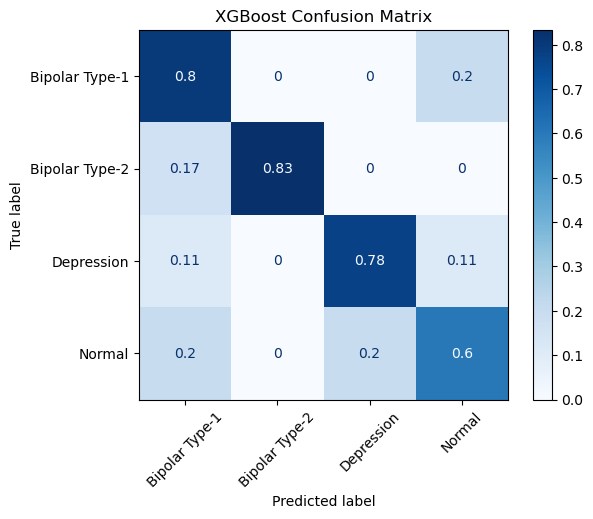

In [20]:
#create a normalized confusion matrix
cm_normalized = confusion_matrix(y_test_xgb, y_pred_best_xgb, labels=best_xgb.classes_, normalize='true')

#display the normalized confusion matrix
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_encoder.classes_)
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')

plt.xticks(rotation=45)

plt.show()

In [19]:
joblib.dump(best_xgb, 'best_xgb.pkl')
best_xgb_pkl_model = joblib.load('best_xgb.pkl')

joblib.dump(label_encoder, 'label_encoder.pkl')
pkl_label_encoder = joblib.load('label_encoder.pkl')